### **Imbalanced data**

`!pip install imblearn`

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_classes=2,
    n_informative=2,
    n_redundant=0,
    weights=[0.1, 0.9],
    flip_y=0,
    class_sep=0.3,
    random_state=45
)

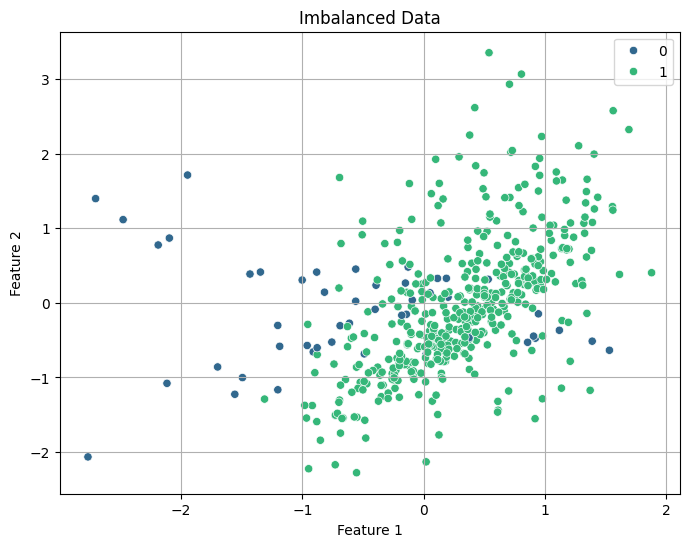

In [ ]:
# plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Imbalanced Data')
plt.grid(True)
plt.show()

In [3]:
# using classifier for prediction

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

classifier = LogisticRegression()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
y_proba = classifier.predict_proba(x_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.89

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.21      0.35        14
           1       0.89      1.00      0.94        86

    accuracy                           0.89       100
   macro avg       0.94      0.61      0.65       100
weighted avg       0.90      0.89      0.86       100



We can observe that,

recall for 0 is 0.21 (which is very low)

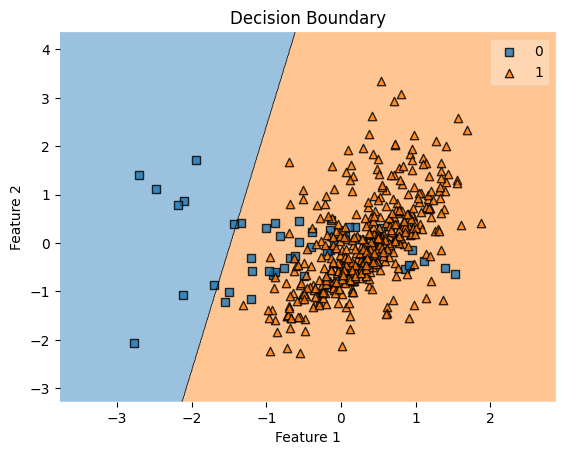

In [4]:
# decision boundary plotting

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=X, y=y, clf=classifier)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()

The classifier gives more focus on +ve points

## **1. Random Undersampling**

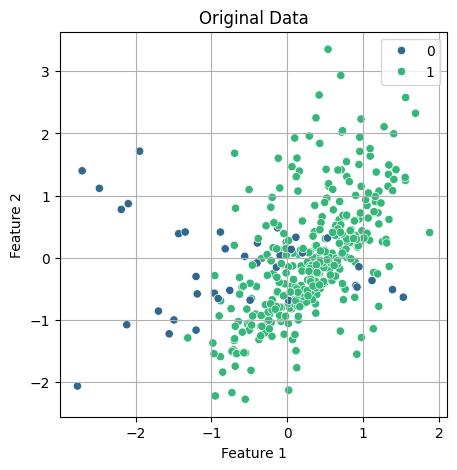

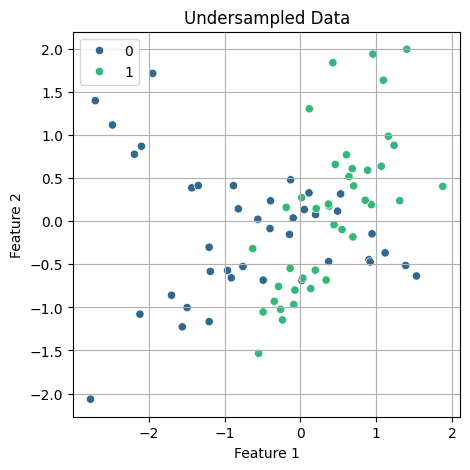

In [6]:
from imblearn.under_sampling import RandomUnderSampler

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, stratify = y)

# applying random under sampling
rus = RandomUnderSampler(random_state=45)
x_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)

# plotting of train data
plt.figure(figsize=(5,5))
sns.scatterplot(x=x_train[:, 0], y=x_train[:, 1], hue=y_train, palette='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')
plt.grid(True)
plt.show()

# plotting
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x_train_rus[:, 0], y=x_train_rus[:, 1], hue=y_train_rus, palette='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Undersampled Data')
plt.grid(True)
plt.show()

In [7]:
# checking the shapes

print("original train shape:", x_train.shape)
print("Under sampled train shape:", x_train_rus.shape)

original train shape: (400, 2)
Under sampled train shape: (80, 2)


In [8]:
print("Train data labels distribution:")
pd.Series(y_train).value_counts()

Train data labels distribution:


1    360
0     40
Name: count, dtype: int64

In [9]:
print("Sampled data labels distribution:")
pd.Series(y_train_rus).value_counts()

Sampled data labels distribution:


0    40
1    40
Name: count, dtype: int64

In [10]:
# applying the logistic classifier

classifier = LogisticRegression()
classifier.fit(x_train_rus, y_train_rus)

y_pred = classifier.predict(x_test)
y_proba = classifier.predict_proba(x_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.77

Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.70      0.38        10
           1       0.96      0.78      0.86        90

    accuracy                           0.77       100
   macro avg       0.61      0.74      0.62       100
weighted avg       0.89      0.77      0.81       100



The precision of '0' - increased some part

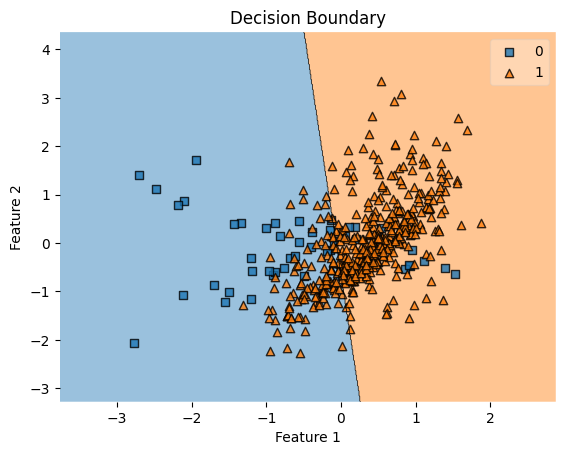

In [11]:
# decision boundary

plot_decision_regions(X=X, y=y, clf=classifier)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()

We can observe that,

Model is considering the '0' labels also

## **2. Random Oversampling**

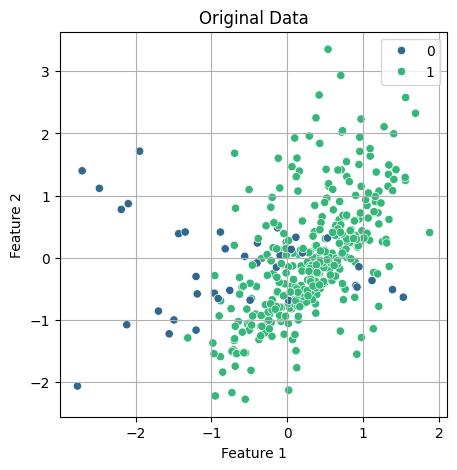

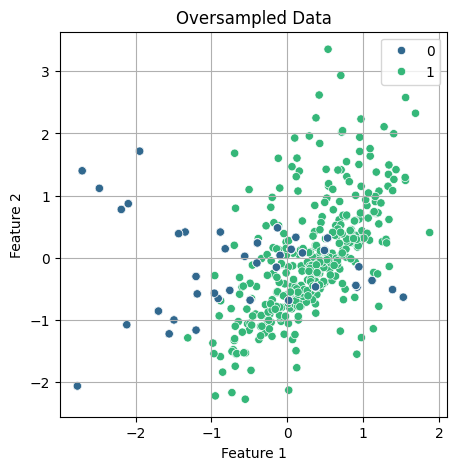

In [13]:
from imblearn.over_sampling import RandomOverSampler

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, stratify = y)

# applying random over sampling
ros = RandomOverSampler(random_state=45)
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)

# plotting of train data
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x_train[:, 0], y=x_train[:, 1], hue=y_train, palette='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')
plt.grid(True)
plt.show()

# plotting
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x_train_ros[:, 0], y=x_train_ros[:, 1], hue=y_train_ros, palette='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Oversampled Data')
plt.grid(True)
plt.show()

We can observe like, data won't change

But actually, points are ovrlapped, (since duplicated)

In [14]:
# checking the shapes

print("original train shape:", x_train.shape)
print("Over sampled train shape:", x_train_ros.shape)

original train shape: (400, 2)
Over sampled train shape: (720, 2)


In [15]:
print("Train data labels distribution:")
pd.Series(y_train).value_counts()

Train data labels distribution:


1    360
0     40
Name: count, dtype: int64

In [16]:
print("Over sampled data labels distribution:")
pd.Series(y_train_ros).value_counts()

Over sampled data labels distribution:


1    360
0    360
Name: count, dtype: int64

In [17]:
# applying the logistic classifier

classifier = LogisticRegression()
classifier.fit(x_train_ros, y_train_ros)

y_pred = classifier.predict(x_test)
y_proba = classifier.predict_proba(x_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.70      0.42        10
           1       0.96      0.82      0.89        90

    accuracy                           0.81       100
   macro avg       0.63      0.76      0.66       100
weighted avg       0.90      0.81      0.84       100



As points are repeated, it gives more importance to the minority class points

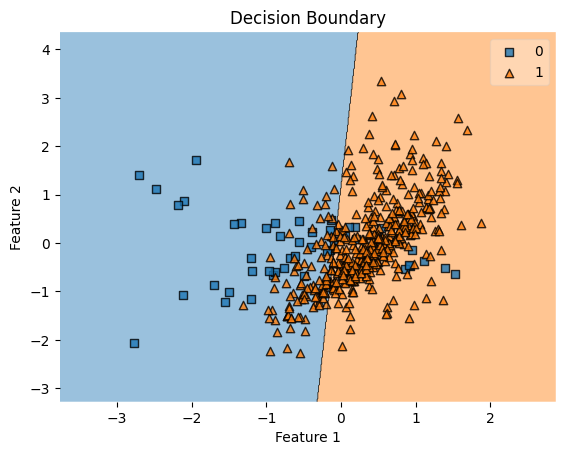

In [18]:
# plot the decision boundary

plot_decision_regions(X=X, y=y, clf=classifier)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()

## **3. SMOTE**

Synthetic Minority Oversampling Technique

In [19]:
from imblearn.over_sampling import SMOTE

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, stratify = y)
smote = SMOTE(random_state=45)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [20]:
x_train_smote.shape

(720, 2)

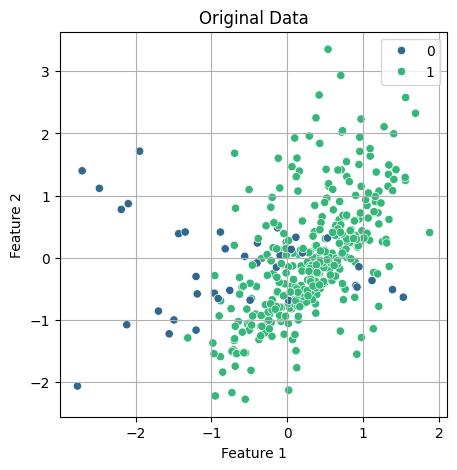

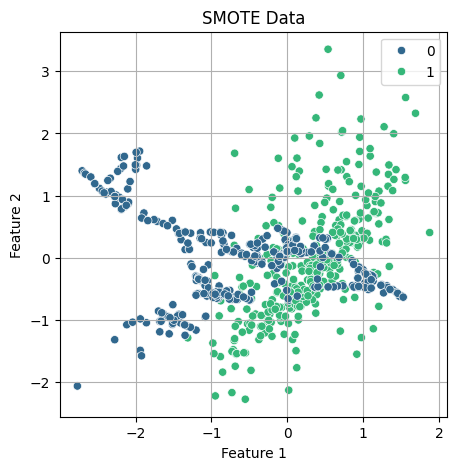

In [21]:
# plotting the train data
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x_train[:, 0], y=x_train[:, 1], hue=y_train, palette='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')
plt.grid(True)
plt.show()

# plotting
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x_train_smote[:, 0], y=x_train_smote[:, 1], hue=y_train_smote, palette='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SMOTE Data')
plt.grid(True)
plt.show()

In [22]:
# checking the shaes

print("original train shape:", x_train.shape)
print("SMOTE sampled train shape:", x_train_smote.shape)

original train shape: (400, 2)
SMOTE sampled train shape: (720, 2)


In [23]:
print("Train data labels distribution:")
pd.Series(y_train).value_counts()

Train data labels distribution:


1    360
0     40
Name: count, dtype: int64

In [24]:
print("SMOTE data labels distribution:")
pd.Series(y_train_smote).value_counts()

SMOTE data labels distribution:


1    360
0    360
Name: count, dtype: int64

In [25]:
# classification using Logistic regression

classifier = LogisticRegression()
classifier.fit(x_train_smote, y_train_smote)

y_pred = classifier.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.70      0.42        10
           1       0.96      0.82      0.89        90

    accuracy                           0.81       100
   macro avg       0.63      0.76      0.66       100
weighted avg       0.90      0.81      0.84       100



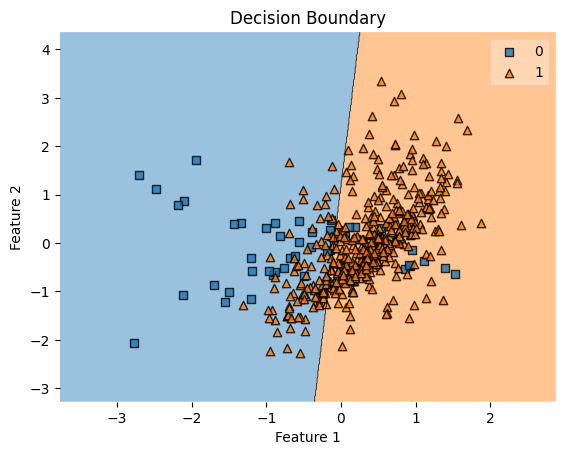

In [26]:
# decision boundary

plot_decision_regions(X=X, y=y, clf=classifier)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()

Giving importance to minority classes also

## **4. Balanced Ensembeling**

In [27]:
from imblearn.ensemble import BalancedRandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, stratify = y)


classifier = BalancedRandomForestClassifier(random_state=45)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.98      0.93      0.95        90

    accuracy                           0.92       100
   macro avg       0.77      0.87      0.81       100
weighted avg       0.94      0.92      0.93       100



Precision is highly increased

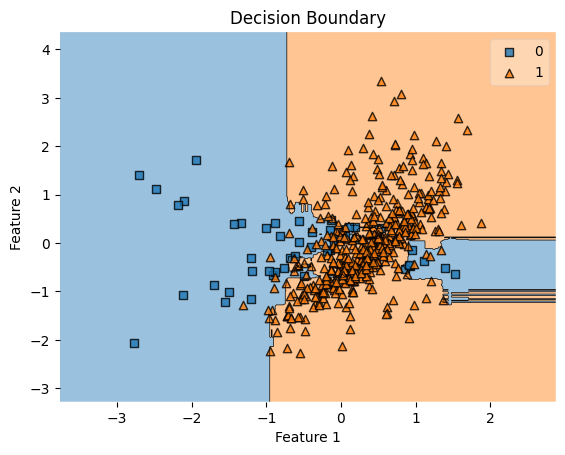

In [29]:
# plotting

plot_decision_regions(X=X, y=y, clf=classifier)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()

We can observe that,

decision boundary gives importance to the minority class also

## **class weights**

Except KNN, Naive bayes

Reamining all classification models has class_weights parameter for giving importance to the minorty class

#### **Logistic Regression**

Accuracy: 0.77

Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.70      0.38        10
           1       0.96      0.78      0.86        90

    accuracy                           0.77       100
   macro avg       0.61      0.74      0.62       100
weighted avg       0.89      0.77      0.81       100



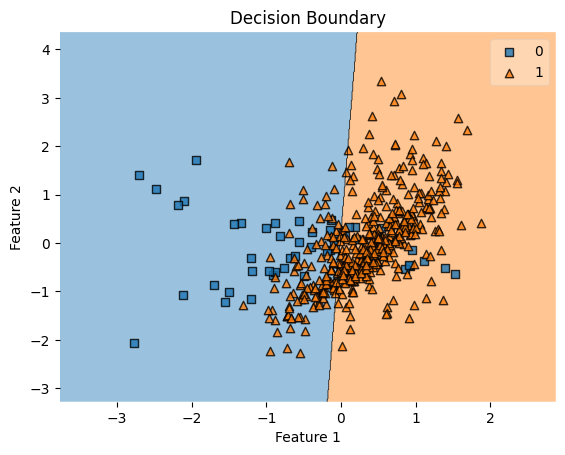

In [30]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, stratify = y)

# model training
classifier = LogisticRegression(class_weight={0:10, 1:1})
classifier.fit(x_train, y_train)

# prediction
y_pred = classifier.predict(x_test)

# scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# plotting
plot_decision_regions(X=X, y=y, clf=classifier)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()

Accuracy: 0.15

Classification Report:
               precision    recall  f1-score   support

           0       0.11      1.00      0.19        10
           1       1.00      0.06      0.11        90

    accuracy                           0.15       100
   macro avg       0.55      0.53      0.15       100
weighted avg       0.91      0.15      0.11       100



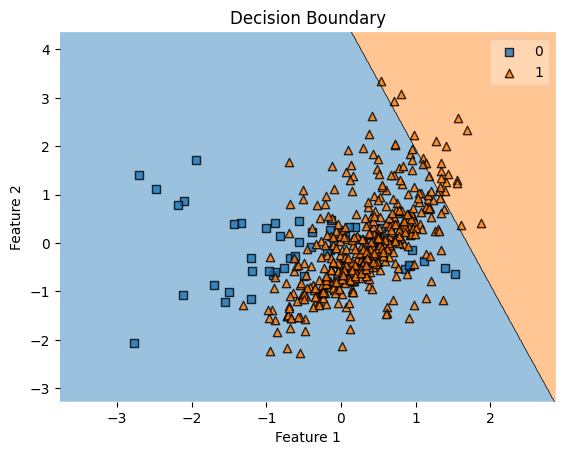

In [ ]:
# model training
classifier = LogisticRegression(class_weight={0:50, 1:1})
classifier.fit(x_train, y_train)

# prediction
y_pred = classifier.predict(x_test)

# scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# plotting
plot_decision_regions(X=X, y=y, clf=classifier)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()

Given high priority for minority class to check the working

#### **SVM**

Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.90      0.69        10
           1       0.99      0.92      0.95        90

    accuracy                           0.92       100
   macro avg       0.78      0.91      0.82       100
weighted avg       0.95      0.92      0.93       100



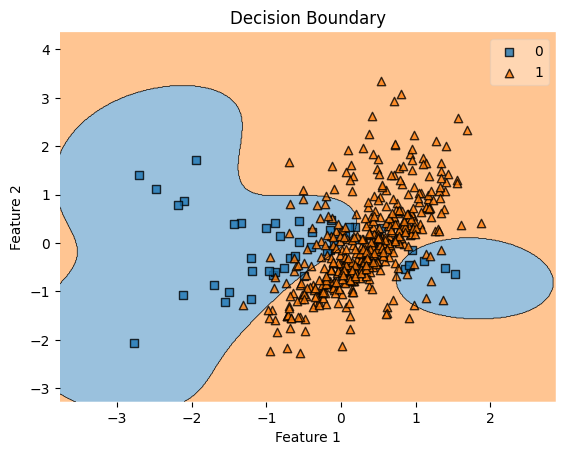

In [31]:
from sklearn.svm import SVC

# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, stratify = y)

# model training
classifier = SVC(
    class_weight={0:10, 1:1},
    kernel='rbf'
)
classifier.fit(x_train, y_train)

# prediction
y_pred = classifier.predict(x_test)

# scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#plotting
plot_decision_regions(X=X, y=y, clf=classifier)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()

#### **Decision Tree**

Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.30      0.38        10
           1       0.93      0.97      0.95        90

    accuracy                           0.90       100
   macro avg       0.71      0.63      0.66       100
weighted avg       0.88      0.90      0.89       100



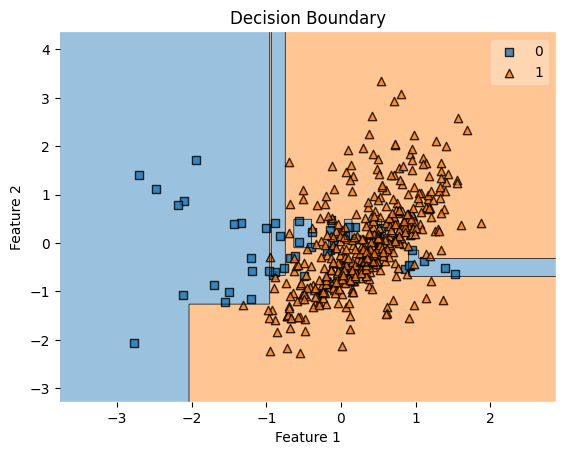

In [32]:
from sklearn.svm import SVC

# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, stratify = y)

# model training
classifier = DecisionTreeClassifier(
    class_weight={0:10, 1:1}
)
classifier.fit(x_train, y_train)

# prediction
y_pred = classifier.predict(x_test)

# scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#plotting
plot_decision_regions(X=X, y=y, clf=classifier)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()

### **Random Forest**

Accuracy: 0.91

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.20      0.31        10
           1       0.92      0.99      0.95        90

    accuracy                           0.91       100
   macro avg       0.79      0.59      0.63       100
weighted avg       0.89      0.91      0.89       100



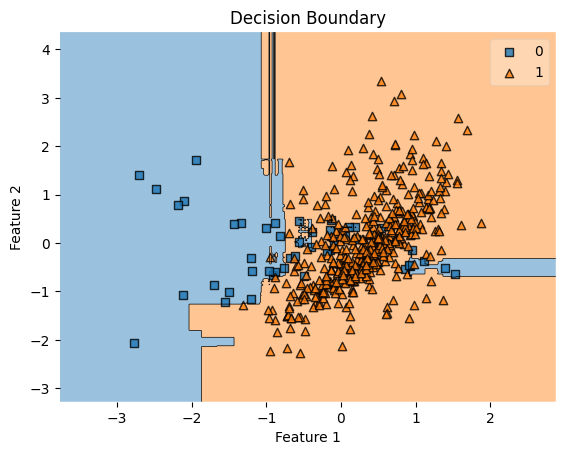

In [33]:
from sklearn.svm import SVC

# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, stratify = y)

# model training
classifier = RandomForestClassifier(
    class_weight={0:10, 1:1},
    n_estimators=1000
)
classifier.fit(x_train, y_train)

# prediction
y_pred = classifier.predict(x_test)

# scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#plotting
plot_decision_regions(X=X, y=y, clf=classifier)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()